**Objective:** The goal is to predict the likelihood of a liability customer buying personal loans

**Data Description**: The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

**Domain**: Banking

**Context**: This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

**Attribute Information**
* **`ID`**: Customer ID
* **`Age`**: Customer's age in completed years
* **`Experience`** : #years of professional experience
* **`Income`**: Annual income of the customer (thousand dollars)
* **`ZIP Code`**: Home Address ZIP code.
* **`Family`**: Family size of the customer
* **`CCAvg`**: Avg. spending on credit cards per month (thousand dollars)
* **`Education`**: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* **`Mortgage`**: Value of house mortgage if any. (thousand dollars)
* **`Personal Loan`**: Did this customer accept the personal loan offered in the last campaign?
* **`Securities Account`**: Does the customer have a securities account with the bank?
* **`CD Account`**: Does the customer have a certificate of deposit (CD) account with the bank?
* **`Online`**: Does the customer use internet banking facilities?
* **`Credit card`**: Does the customer use a credit card issued by bank

**Learning Outcomes**
* Exploratory Data Analysis
* Preparing the data to train a model
* Training and making predictions using a classification model
* Model evaluation

#### Import libraries and load data

In [91]:
import pandas as pd
import numpy as np, seaborn as sns, warnings
from matplotlib import pyplot as plt
import matplotlib.style as style; style.use('seaborn-pastel')

from scipy.stats import zscore, norm

warnings.filterwarnings('ignore')
%matplotlib inline

#printing available styles in plt
print(plt.style.available)


#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

# calculate accuracy measures and confusion matrix
from sklearn import metrics

pd.options.display.max_rows = 4000

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [92]:
# Reading the data as dataframe and print the first five rows
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## <a id = "link2"></a> Univariate Analysis

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<u>**Observation - 1:**</u>
- Total number of observations is 5,000 and attributes are in the correct datatype
- There are no null values in the dataset

In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<u> **Observation - 2:**</u>

**`ID`**: This seems to be a running row number with a minimum of 1 and maximum of 5000; this variable can be dropped later

**`Age`**: Minimum age is 23 and maximum age is 67 with a standard deviation of 11.46 years. Mode is (50% ) around 45 which is more or less equal to the average age 45.338 years which indicates that the data is distributed normally.Range of Q1 to Q3 range from 35 to 55.

**`Experience`**: Minimum experience being -3 and maximum is 43 with an average experience of around 20 years. Since there are negative values with experience, I will have to impute them later. Range of Q1 to Q3 are from 35 to 55.

**`Income`**: Minimum income is 8,000 and max income is around 224,000 with a mean of 73,000.

**`ZIP Code`**: Nominal variable. There is nothing meanigful I can derive from the table above. I might retain Zip later in the analysis or drop it if I cannot come to a meaningful conclusion.

**`Family`**:Minimum is 1 and maximum is 4

**`CCAvg`**: Average spending on the credit card is 1,930 with a minimum spending of 0 and a maximum spending of 10K.Here mean is greater than median, I think this distribution could be skewed to the right.

**`Education`**: Ordinal variable with the following labels - 1: Undergrad; 2: Graduate; 3: Advanced/Professional.

**`Mortgage`**: Minimum mortgage is 0 dollars and maximum is 635,000 dollars. 75% of data values have a value of 101,000 which indicates that this could be skewed to right as well just like CCAvg variable.

**`Personal Loan`**:This will be the dependent variable and appears to be categorical in nature. If the customer accepted the personal loan it will appear as 1 else it will be 0.

**`Securities Account`**: Appears to be a categorical variable. If the customer has a securities account, then it will be coded as 1 else 0.

**`CD Account`**: Appears to be a categorical variable. If the customer has a certificate of deposit account, it will appear as 1 else 0 in the observation.

**`Online`**: Appears to be a categorical variable. If the customer uses internet banking facilities they will have a 1 else 0.

**`CreditCard`**: Appears to be categorical as well. If the customer uses a credit card issued by the bank, it will be 1 else 0.



In [95]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

<b><u>Observation - 3: </b></u>

- ID column can be dropped as every row is unique which is represented by 5000 unique values.
- Zip code has 467 unique values. I am not sure if this variable needs to be included in modelling.

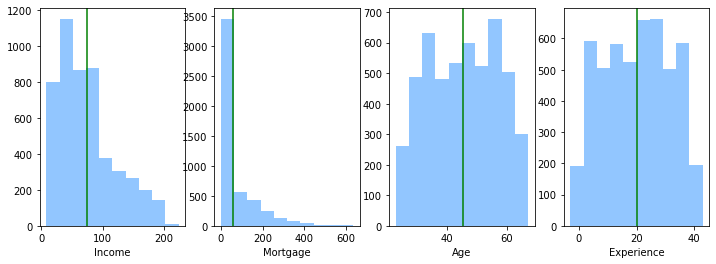

In [96]:
#Let's plot continuous variables to visually to see how they are distributed
fig, [x0, x1, x2, x3] = plt.subplots(1,4, figsize = (12,4))


x0.hist(df.Income)
x0.set_xlabel('Income')
x0.axvline(df.Income.mean(), color = "green")

x1.hist(df.Mortgage)
x1.set_xlabel('Mortgage')
x1.axvline(df.Mortgage.mean(), color = "green")

x2.hist(df.Age)
x2.set_xlabel('Age')
x2.axvline(df.Age.mean(), color = "green")

x3.hist(df.Experience)
x3.set_xlabel('Experience')
x3.axvline(df.Experience.mean(), color = "green")


<b><u>Observation - 3a: </b></u>

- Visually observed continuous variables such as Income, Mortgage, Age and Experience and the green line is the mean. Like above, Age, Experience seems to be normally distributed and Income seems to be right skewed

<b><u>Distribution of Dependent Variable: </b></u>

In [97]:
display(df['Personal Loan'].value_counts(), df['Personal Loan'].value_counts(normalize = True)*100)

0    4520
1     480
Name: Personal Loan, dtype: int64

0    90.4
1     9.6
Name: Personal Loan, dtype: float64

<b><u>Observation - 4:</b></u>

- There are 0nly 480 customers who accepted the personal loan offer. It is around 9.6% of the total.

In [98]:
#Experience has negative values so visualizing how the data is distributed
df.loc[df['Experience'] < 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [99]:
#df.loc[df['Experience'] < 0].count()
df.loc[df['Experience'] < 0].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,52.0,2427.346154,1478.834118,90.0,767.25,2783.5,3669.500,4958.0
Age,52.0,24.519231,1.475159,23.0,24.00,24.0,25.000,29.0
Experience,52.0,-1.442308,0.639039,-3.0,-2.00,-1.0,-1.000,-1.0
Income,52.0,69.942308,37.955295,12.0,40.75,65.5,86.750,150.0
ZIP Code,52.0,93240.961538,1611.654806,90065.0,92167.75,93060.0,94720.000,95842.0
Family,52.0,2.865385,0.970725,1.0,2.00,3.0,4.000,4.0
CCAvg,52.0,2.129423,1.750562,0.2,1.00,1.8,2.325,7.2
Education,52.0,2.076923,0.836570,1.0,1.00,2.0,3.000,3.0
Mortgage,52.0,43.596154,90.027068,0.0,0.00,0.0,0.000,314.0
Personal Loan,52.0,0.000000,0.000000,0.0,0.00,0.0,0.000,0.0


<b><u> Observation - 5 - Negative Experience Imputation:</b></u> 

- There are 52 records that have negative experience. This ranges from -2 to -1 as it is displayed in Range Q1 to Q3.
- There are 2 ways I can handle to impute the negative experience. One I can drop all these 52 records but I am going to try the second method which is replacing with the mean.

In [100]:
#Idea is to replace the negative experience variable with median. In order to do that, I am creating a variable which calculates the 
# median only for those 52 records and the way I am identifying them is via the age variable i.e. using age between
#23 and 29, I am isolating only those 52 records to impute the value to be substituted later.
z1 = df.loc[(df['Age'] > 23) & (df['Age'] <= 29),'Experience'].median()
#replace negative Experience value
df['Experience'] = np.where(df['Experience']<0, z1, df['Experience'])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.140400,11.405644,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<b><u>Observation - 6: </b></u>

- After substituting negative values of experience with median, the min and max values for Expereince is 0 and 43 respectively. If I look at the mean before, it was 20.104 and after imputing, the mean value is 20.14. So the impuation didn't change the values significantly.

Text(0.5, 1.0, 'CC Average Distribution of Customers who have taken Personal Loan')

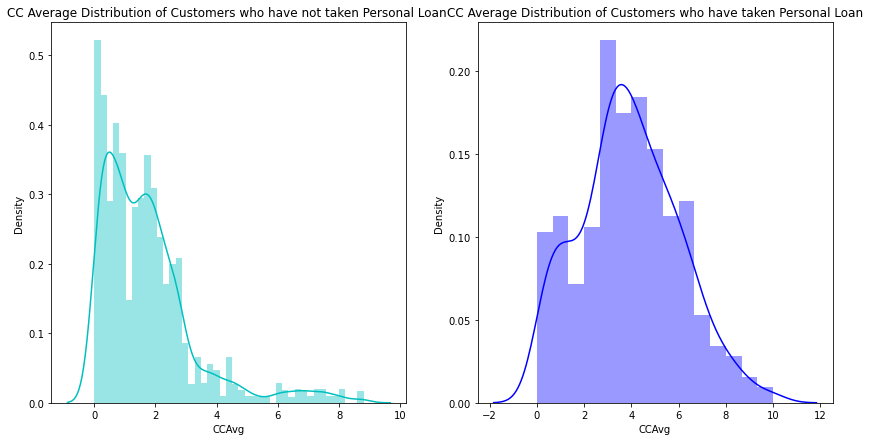

In [101]:
# Distribution of CC Average
fig = plt.figure(figsize = (14, 7))

ax = fig.add_subplot(121)
sns.distplot(df[(df['Personal Loan'] == 0)]['CCAvg'], color = 'c', 
             ax = ax).set_title('CC Average Distribution of Customers who have not taken Personal Loan ')

ax= fig.add_subplot(122)
sns.distplot(df[(df['Personal Loan'] == 1)]['CCAvg'], color = 'b', 
             ax = ax).set_title('CC Average Distribution of Customers who have taken Personal Loan')

Text(0.5, 1.0, 'Mortgage Distribution of Customers who have taken Personal Loan')

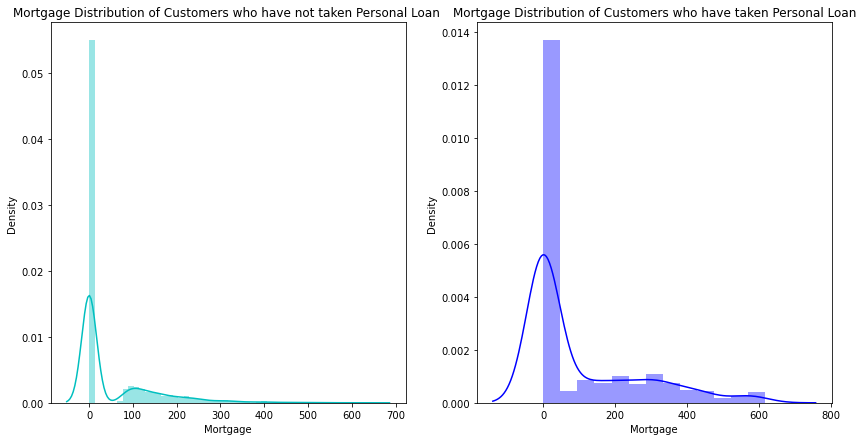

In [102]:
# Distribution of Mortgage
fig = plt.figure(figsize = (14, 7))

ax = fig.add_subplot(121)
sns.distplot(df[(df['Personal Loan'] == 0)]['Mortgage'], color = 'c', 
             ax = ax).set_title('Mortgage Distribution of Customers who have not taken Personal Loan ')

ax= fig.add_subplot(122)
sns.distplot(df[(df['Personal Loan'] == 1)]['Mortgage'], color = 'b', 
             ax = ax).set_title('Mortgage Distribution of Customers who have taken Personal Loan')


Text(0.5, 1.0, 'Income Distribution of Customers who have taken Personal Loan')

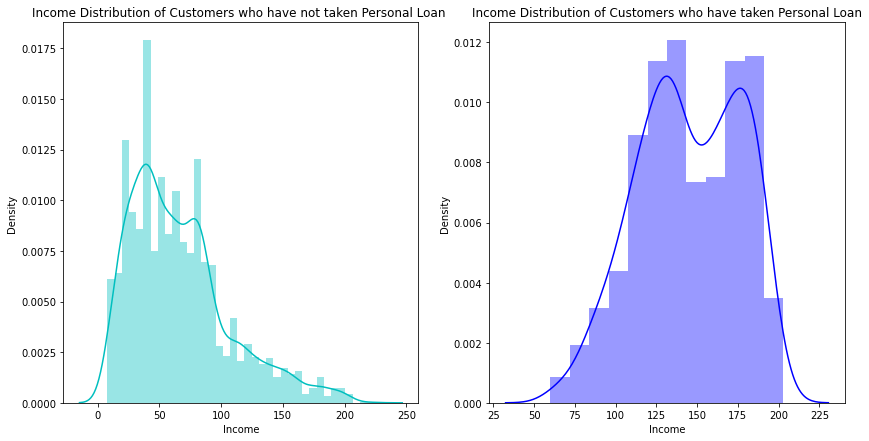

In [103]:
# Distribution of Income
fig = plt.figure(figsize = (14, 7))

ax = fig.add_subplot(121)
sns.distplot(df[(df['Personal Loan'] == 0)]['Income'], color = 'c', 
             ax = ax).set_title('Income Distribution of Customers who have not taken Personal Loan ')

ax= fig.add_subplot(122)
sns.distplot(df[(df['Personal Loan'] == 1)]['Income'], color = 'b', 
             ax = ax).set_title('Income Distribution of Customers who have taken Personal Loan')

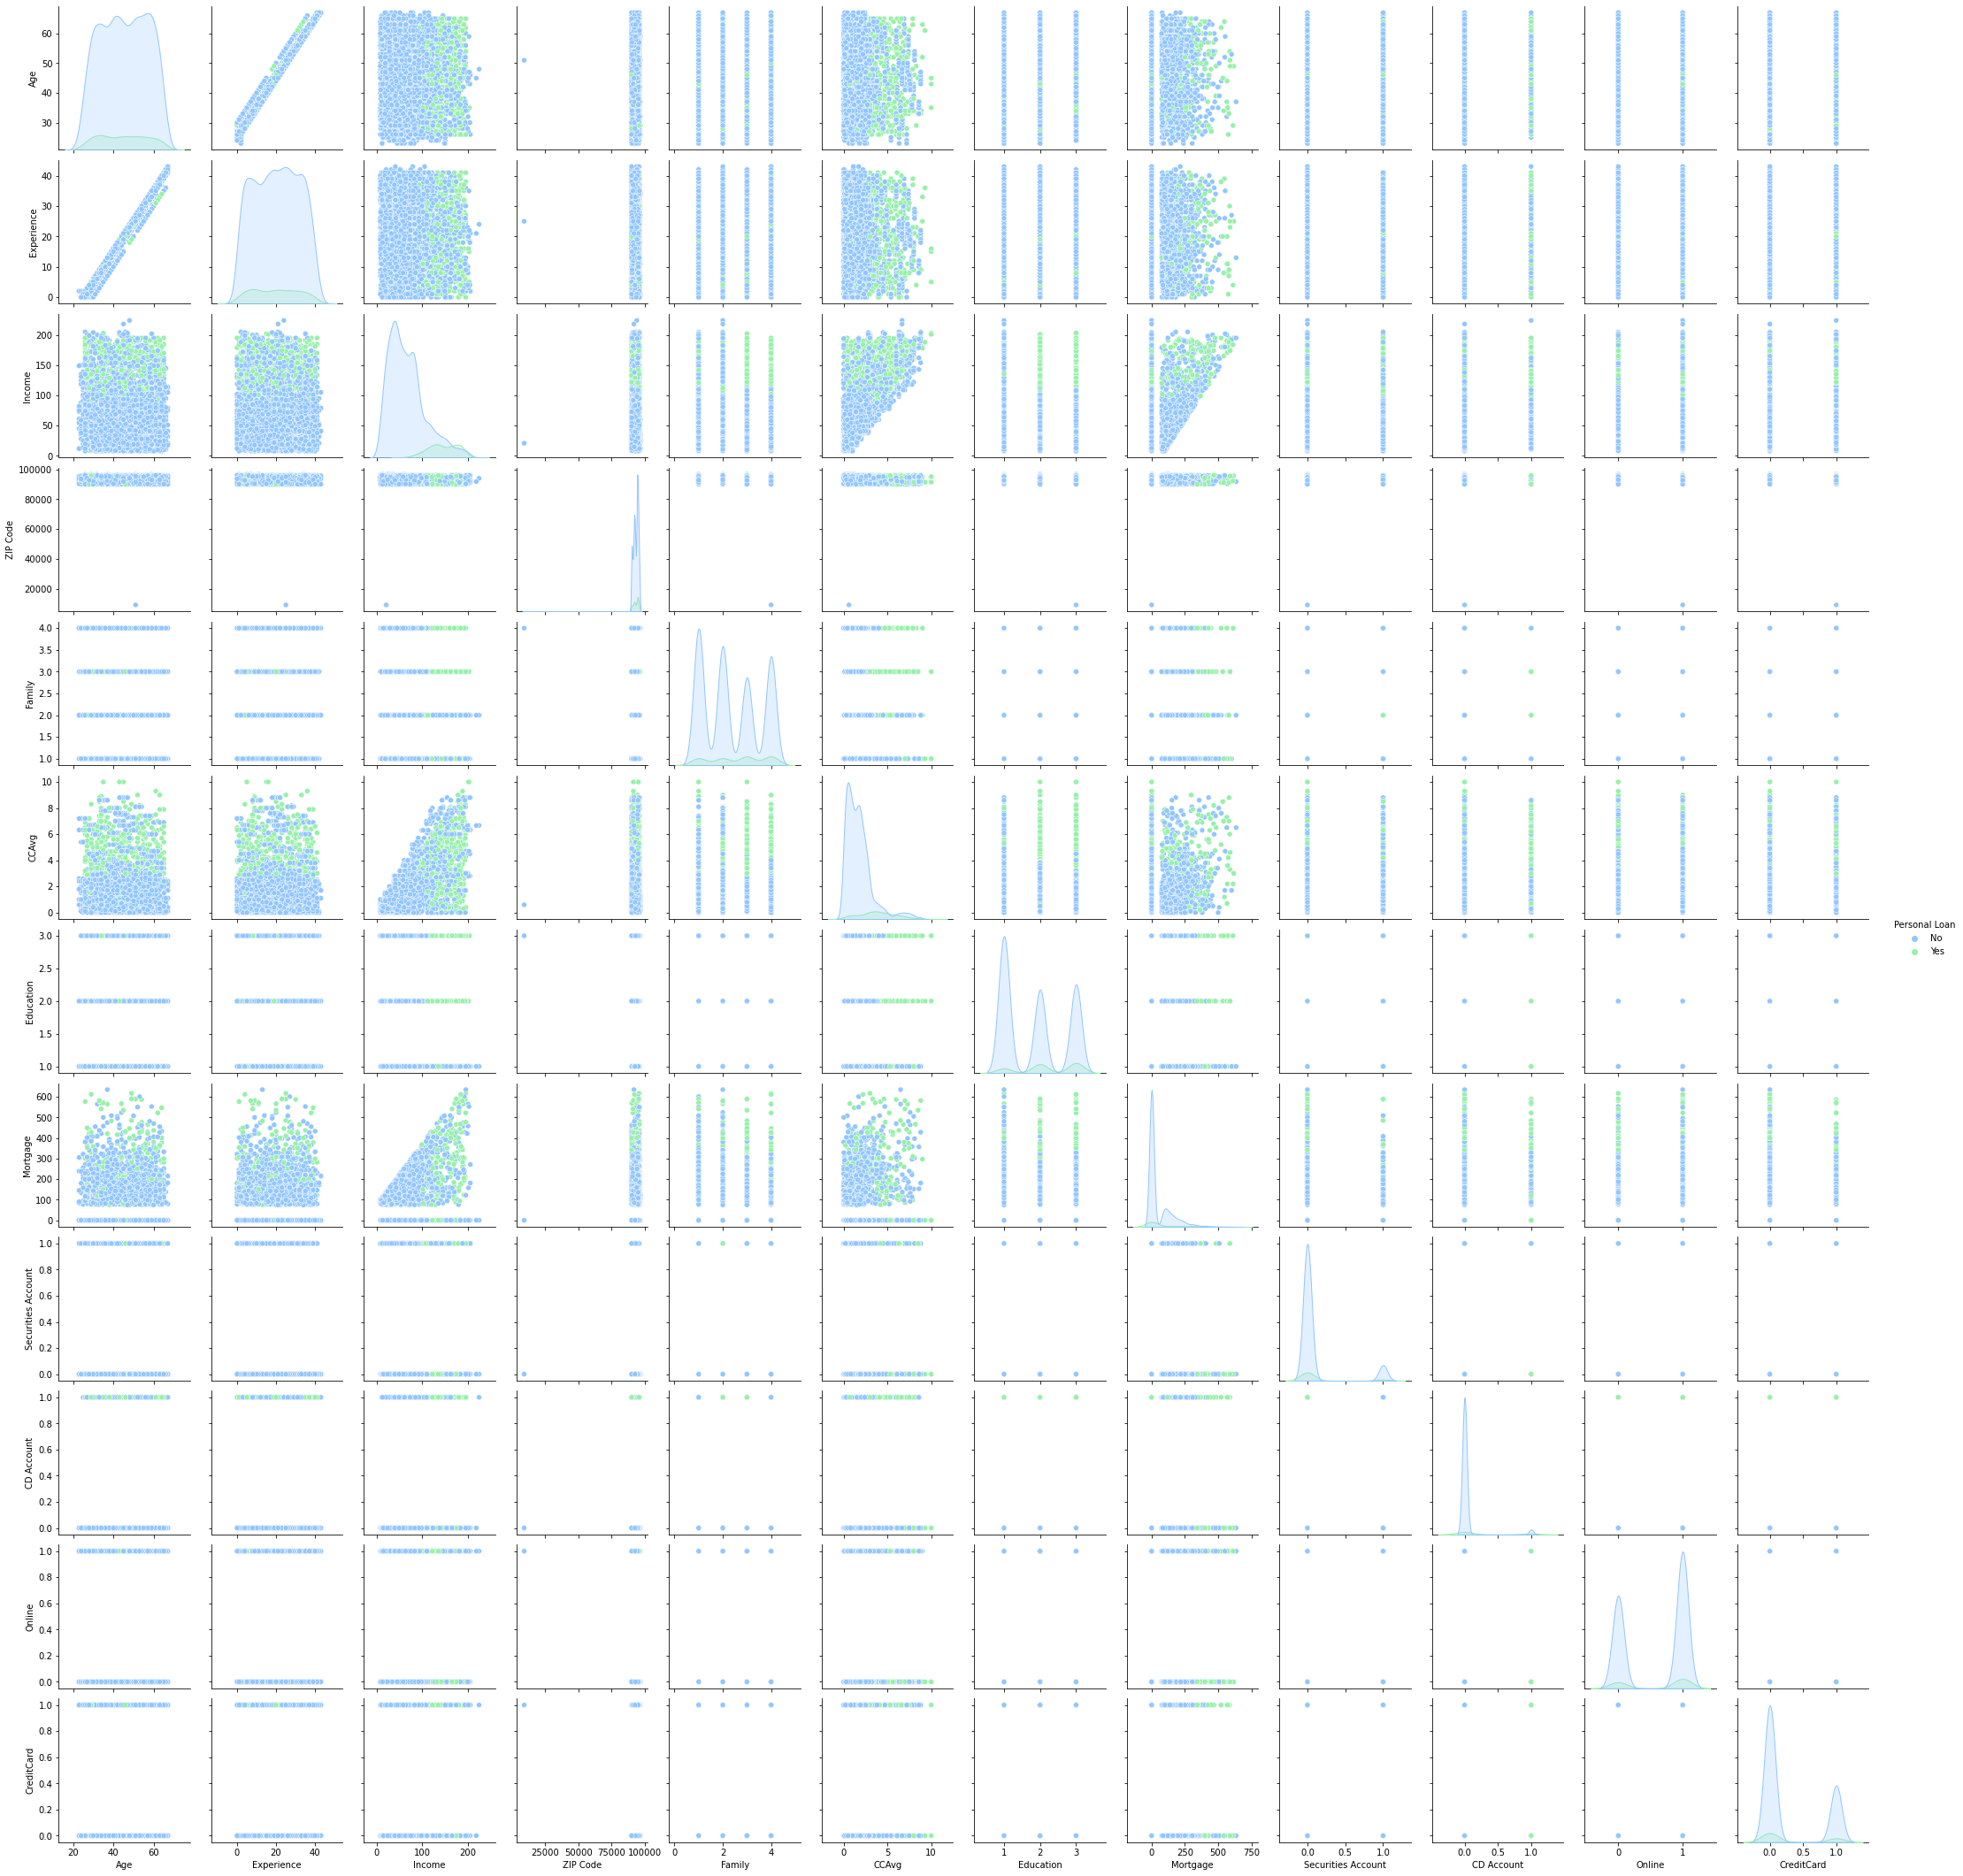

In [104]:
#Displaying a pairplot
pp = df.drop('ID', axis = 1)
pp['Personal Loan'] = pp['Personal Loan'].replace({0: 'No', 1: 'Yes'})
sns.pairplot(pp, hue = 'Personal Loan')

<b><u>Observation - 7: </b></u>

- **`Age`** and **`Experience`** seems to have a relationship
- **`CC Avg`** seems to differ for people taking personal loan and those who didn't
- **`Family size, Mortgage, CD Account, Education` seems to be factors for customers taking personal loan

#### Distribution of various variables by Personal Loan

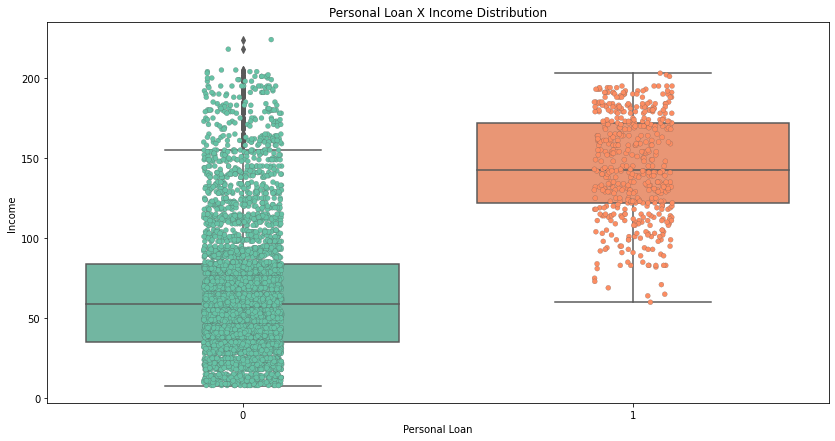

In [105]:
# Distribution of Income
plt.figure(figsize = (14 , 7))
ax = sns.boxplot(x = 'Personal Loan', y = 'Income', palette = 'Set2', data = df)
ax = sns.stripplot(x = 'Personal Loan', y = 'Income', palette = 'Set2', data = df, 
               linewidth = 0.2)
ax.set_title('Personal Loan X Income Distribution')
plt.show()

Text(0.5, 1.0, 'Personal Loan X CC Avg Distribution')

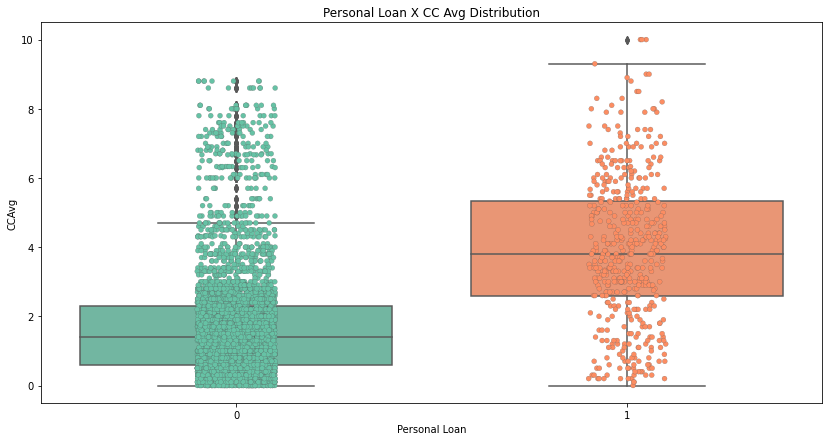

In [106]:
# Distribution of CCAvg
plt.figure(figsize = (14 , 7))
ax = sns.boxplot(x = 'Personal Loan', y = 'CCAvg', palette = 'Set2', data = df)
ax = sns.stripplot(x = 'Personal Loan', y = 'CCAvg', palette = 'Set2', data = df, 
               linewidth = 0.2)
ax.set_title('Personal Loan X CC Avg Distribution')

Text(0.5, 1.0, 'Personal Loan X Family Distribution')

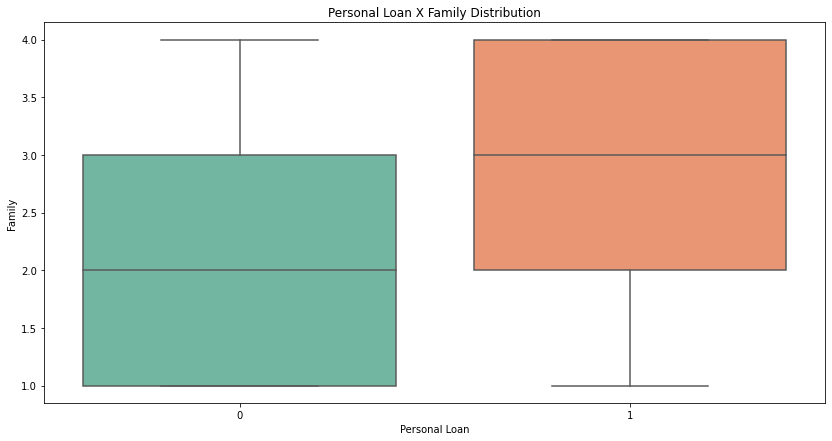

In [107]:
# Distribution of Family
plt.figure(figsize = (14 , 7))
ax = sns.boxplot(x = 'Personal Loan', y = 'Family', palette = 'Set2', data = df)
ax.set_title('Personal Loan X Family Distribution')

Text(0.5, 1.0, 'Personal Loan X Education Distribution')

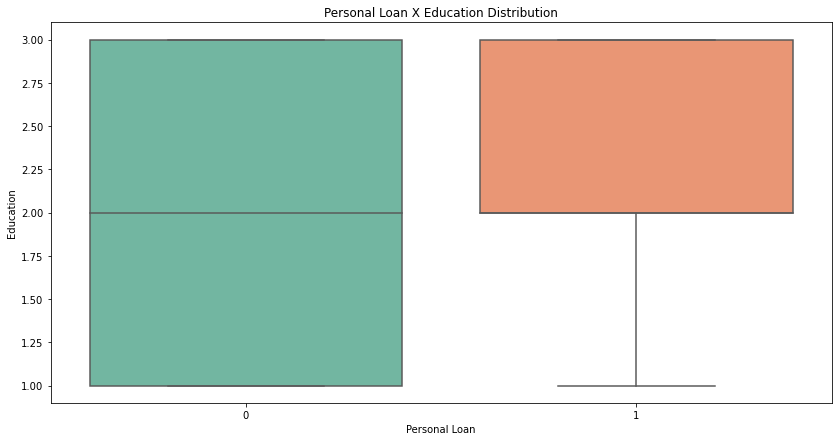

In [108]:
# Distribution of Eduction
plt.figure(figsize = (14 , 7))
ax = sns.boxplot(x = 'Personal Loan', y = 'Education', palette = 'Set2', data = df)
ax.set_title('Personal Loan X Education Distribution')

<AxesSubplot:xlabel='Education', ylabel='count'>

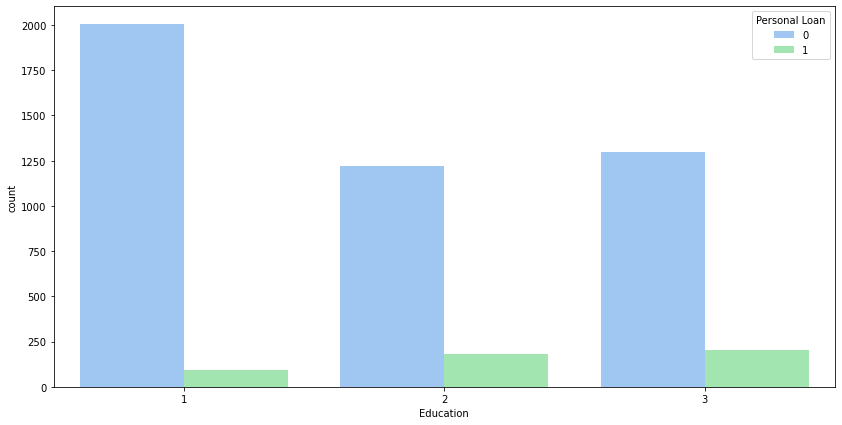

In [109]:
# Countplot of Education by Personal Loan
plt.figure(figsize = (14 , 7))
sns.countplot(x = 'Education', hue ='Personal Loan', data = df)

<AxesSubplot:xlabel='CD Account', ylabel='count'>

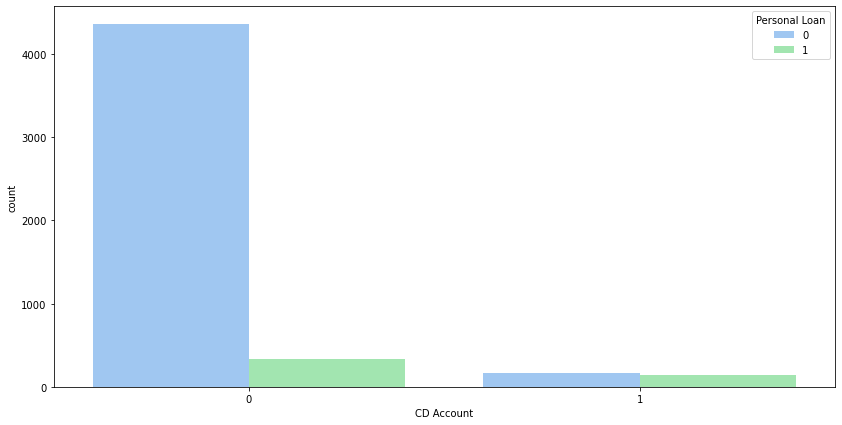

In [110]:
# Countplot of CD Account by Personal Loan
plt.figure(figsize = (14 , 7))
sns.countplot(x = 'CD Account', hue ='Personal Loan', data = df)

<AxesSubplot:xlabel='Securities Account', ylabel='count'>

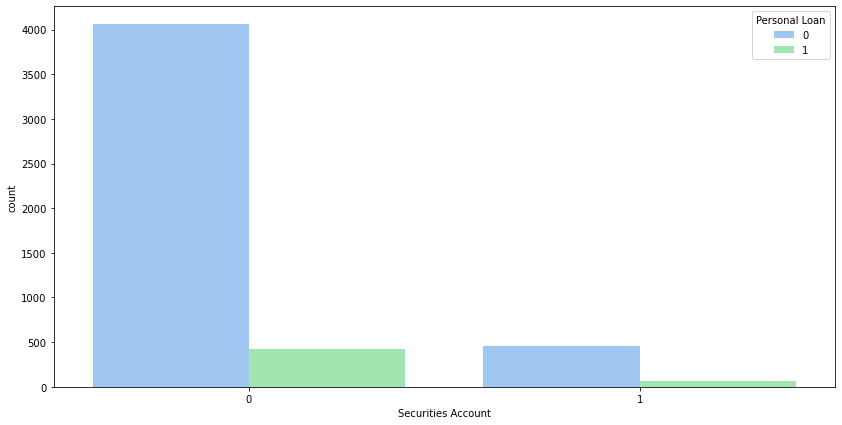

In [111]:
# Countplot of Securities Account by Personal Loan
plt.figure(figsize = (14 , 7))
sns.countplot(x = 'Securities Account', hue ='Personal Loan', data = df)

<AxesSubplot:xlabel='Online', ylabel='count'>

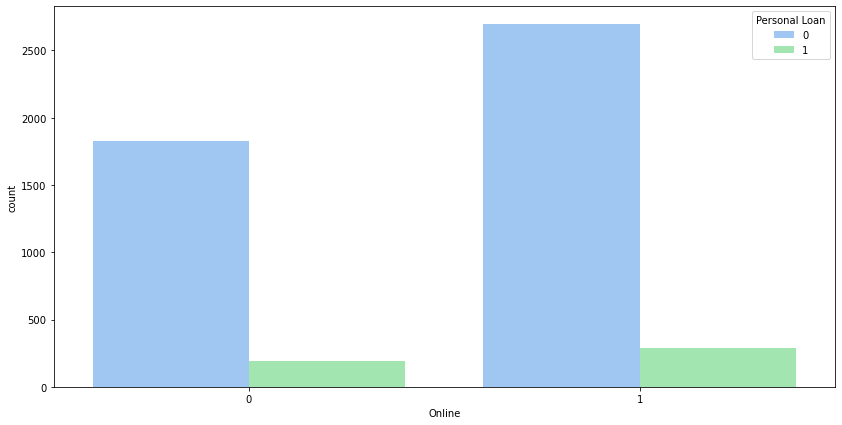

In [112]:
# Countplot of Securities Account by Personal Loan
plt.figure(figsize = (14 , 7))
sns.countplot(x = 'Online', hue ='Personal Loan', data = df)

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

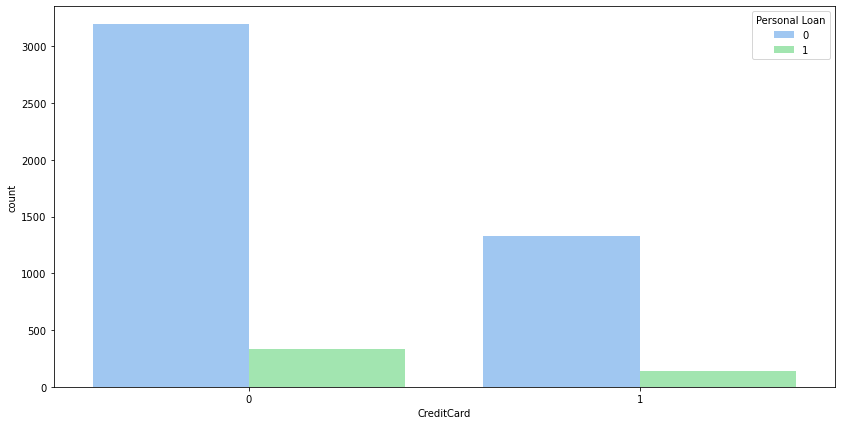

In [113]:
# Countplot of Credit Card by Personal Loan
plt.figure(figsize = (14 , 7))
sns.countplot(x = 'CreditCard', hue ='Personal Loan', data = df)

<b><u> Observation - 8: </b> </u>

- Looks like higher the spending on Credit card those customers have taken the personal loan
- Similarly, higher income folks have taken the personal loan
- Higher the education the more likely they will take on personal loan


**Cleaning Data**

In [114]:
#Removing ID and Zipcode from the dataset as they are not at all required for modelling purposes
df.drop(['ID', 'ZIP Code'], axis = 1, inplace = True)
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

**Correlation**

In [115]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')


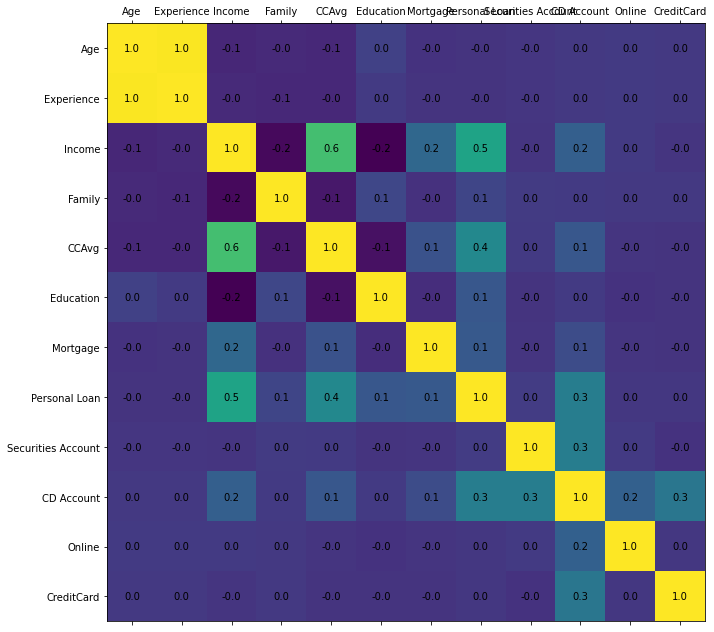

In [116]:
plot_corr(df)

In [117]:
pp.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.993922,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681
Experience,0.993922,1.000000,-0.047024,-0.028795,-0.051627,-0.049865,0.014003,-0.011104,-0.001049,0.009614,0.013944,0.008915
Income,-0.055269,-0.047024,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028795,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.051627,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049865,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.014003,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.011104,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231
Securities Account,-0.000436,-0.001049,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.009614,0.169738,0.019972,0.014110,0.136534,0.013934,0.089311,0.317034,1.000000,0.175880,0.278644


In [118]:
#Finding variables that have more than 0.6 corr coefficient
c2 = df.drop('Personal Loan', axis = 1).corr()
a = c2.abs().unstack()
a = a.sort_values(kind = "quicksort", ascending = False)
a[(a > 0.6) & (a < 1)]

Experience  Age           0.993922
Age         Experience    0.993922
CCAvg       Income        0.645984
Income      CCAvg         0.645984
dtype: float64

<b><u> Observation 9 </b></u>

- Age and Experience are highly positively correlated. If I include both, it will introduce multi-collinearity. So I am going to pick up just one variable
- CC Average and Income are also positively correlated.
- Other than the above variables, I see only low correlation among other variables

In [119]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.140400,11.405644,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


**Modelling**

In [120]:
# dropping age, online and Credit card columnns from the dataset
#reason for dropping age is since age and experience are highly correlated, we wanted to avoid multi-collinearity so dropping age.
#reason for dropping online and credit card is that there is absolutely no correlation at all
df.drop(['Age', 'Online', 'CreditCard'], axis = 1, inplace = True)
df.columns

Index(['Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account'],
      dtype='object')

In [121]:
# Separating dependent and independent variables
X = df.drop(['Personal Loan'], axis = 1)
y = df['Personal Loan']

display(X.describe().T, X.shape, y.shape)

,count,mean,std,min,25%,50%,75%,max
Experience,5000.0,20.140400,11.405644,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


(5000, 8)

(5000,)

In [122]:
# Scaling the independent variables
Xs = X.apply(zscore)
display(Xs.describe().T, Xs.shape, y.shape)

,count,mean,std,min,25%,50%,75%,max
Experience,5000.0,4.760636e-17,1.0001,-1.766004,-0.889158,-0.012311,0.864536,2.004436
Income,5000.0,1.939449e-16,1.0001,-1.428969,-0.755483,-0.212348,0.526315,3.263712
Family,5000.0,7.850609e-16,1.0001,-1.216855,-1.216855,-0.345432,0.525991,1.397414
CCAvg,5000.0,-2.078338e-17,1.0001,-1.108987,-0.708412,-0.250611,0.321641,4.613525
Education,5000.0,-6.315837e-16,1.0001,-1.049078,-1.049078,0.141703,1.332484,1.332484
Mortgage,5000.0,2.810197e-16,1.0001,-0.555524,-0.555524,-0.555524,0.437558,5.688108
Securities Account,5000.0,5.092149e-16,1.0001,-0.341423,-0.341423,-0.341423,-0.341423,2.928915
CD Account,5000.0,4.426903e-16,1.0001,-0.253540,-0.253540,-0.253540,-0.253540,3.944146


(5000, 8)

(5000,)

**Logistic Regression**

In [123]:
# Splitting the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3500, 8)

(1500, 8)

(3500,)

(1500,)

In [124]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=4294967295,fit_intercept=False, solver="liblinear")
logreg.fit(X_train, y_train)                    # fit the model on train data

LogisticRegression(fit_intercept=False, random_state=4294967295,
                   solver='liblinear')

In [125]:
y_predict = logreg.predict(X_test)              # Predicting the target variable on test data

In [126]:
# Observe the predicted and observed classes in a dataframe.

z = X_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
z.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Observed Loan Status,Predicted Loan Status
3406,12.0,34,3,2.0,3,0,0,0,0,0
757,28.0,81,3,1.8,2,0,1,0,0,0
3624,28.0,70,1,1.4,3,0,0,0,0,0
4544,4.0,80,3,2.5,1,0,0,0,0,0
3235,35.0,39,2,1.6,3,0,0,0,0,0


In [127]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.8928571428571429

Testing accuracy 0.8946666666666667

Confusion Matrix


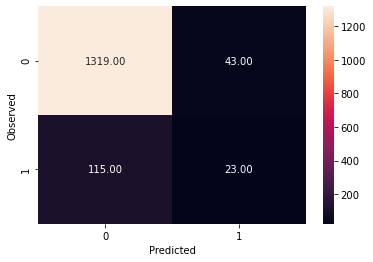

None

Recall: 0.16666666666666666

Precision: 0.3484848484848485

F1 Score: 0.22549019607843138

Roc Auc Score: 0.7535008193406967


In [128]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1] ))

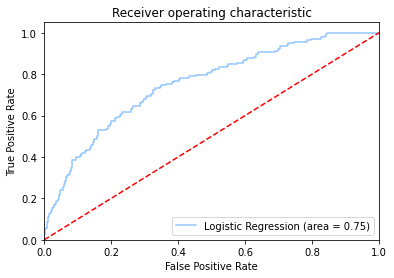

In [129]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [130]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
7,CD Account,2.67
6,Securities Account,1.13
2,Family,0.51
4,Education,0.36
3,CCAvg,0.08
0,Experience,0.06
1,Income,0.01
5,Mortgage,0.00


In [131]:
import statsmodels.api as sm

logit = sm.Logit( y_train, sm.add_constant( X_train ) )

lg = logit.fit()

lg.summary()

Optimization terminated successfully.
         Current function value: 0.138232
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3491
Method:                           MLE   Df Model:                            8
Date:                Fri, 19 Mar 2021   Pseudo R-squ.:                  0.5681
Time:                        23:02:31   Log-Likelihood:                -483.81
converged:                       True   LL-Null:                       -1120.1
Covariance Type:            nonrobust   LLR p-value:                1.970e-269
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.8004      0.677    -20.375      0.000     -15.128     -12.473
Experience             0.0115      0.007      1.535      0.125      -0.003       0.026
Income                 0.0511      0.003     17.531      0.000       0.045       0.057
Family                 0.7632      0.086      8.885      0.000       0.595       0.931
CCAvg                  0.1571      0.046      3.405      0.001       0.067       0.247
Education              1.6328      0.126     12.927      0.000       1.385       1.880
Mortgage               0.0008      0.001      1.285      0.199      -0.000       0.002
Securities Account    -0.4391      0.318     -1.383      0.167      -1.061       0.183
CD Account             2.5818      0.313      8.240      0.000       1.968       3.196
======================================================================================
"""

In [132]:
y_pred_df = pd.DataFrame()

y_pred_df['actual'] = y_test

y_pred_df["predicted_prob"] = lg.predict( sm.add_constant( X_test ) )
## Used statsmodel logit function to predict probaility of output being from class '1'

y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.6 else 0)
# Converted values which are above 0.6 as '1' and rest as '0'.
## Therefore thershold here is 0.6 as values above 0.6 probability is converted to '1'

y_pred_df[0:50]

,actual,predicted_prob,predicted
3406,0,0.011851,0
757,0,0.019051,0
3624,0,0.017623,0
4544,0,0.004717,0
3235,0,0.008752,0
1868,0,0.010819,0
2916,0,0.000669,0
3335,0,0.048199,0
3527,0,0.012926,0
2827,0,0.061900,0


**Conclusion**

To Summarize:

- Personal loan is kept as the dependent variable and the following variables viz., online and credit card were dropped since they had negligible correlation
- Age variable was dropped to avoid multicollinearity with Experience.
- AUC is about 0.75 which indicates that the model is ok but it not the best model. There is a likelihood that the model can do better with fine tuning or introducing other variables.
- True Positive (observed=1,predicted=1): 23 customers were Predicted as someone that they could accept a personal loan and the customer has actually accepted the personal loan offer.
- False Positive (observed=0,predicted=1): Predicted that 43 customers who has a personal loan but they don't have a personal loan.
- True Negative (observed=0,predicted=0): 1319 predicted that they don't have a personal loan and those customers indeed didn't have a personal loan.
- False Negative (observed=1,predicted=0): 115 predicted that they don't have a personal loan but they have a personal loan.
- Precision = 0.34844 indicates that the classifier is accurate only 34.844% times
- F1 = 0.2254 which indicates there is a lot of room for model improvement. I read on multiple blogging sites that there are numerous ways to improve F1 which includes oversampling methods such as standard scalar, SMOTE, hyperparameter tuning etc.
- Finally, I built the logit model to score predicted probability and I attempt here to interpret logit regression results:
- Income, Family, CCAverage, Mortgage & having a CD account seem to have statistically significant pr. score. 